In [1]:
import os, sys
sys.path.insert(0, '/home/gaozw/pythonScripts/')

import matplotlib.pyplot as plt
%matplotlib notebook

from ofpost.ofsets import *

In [2]:
case_dir = './wall_HagradientEnergy'

<IPython.core.display.Javascript object>


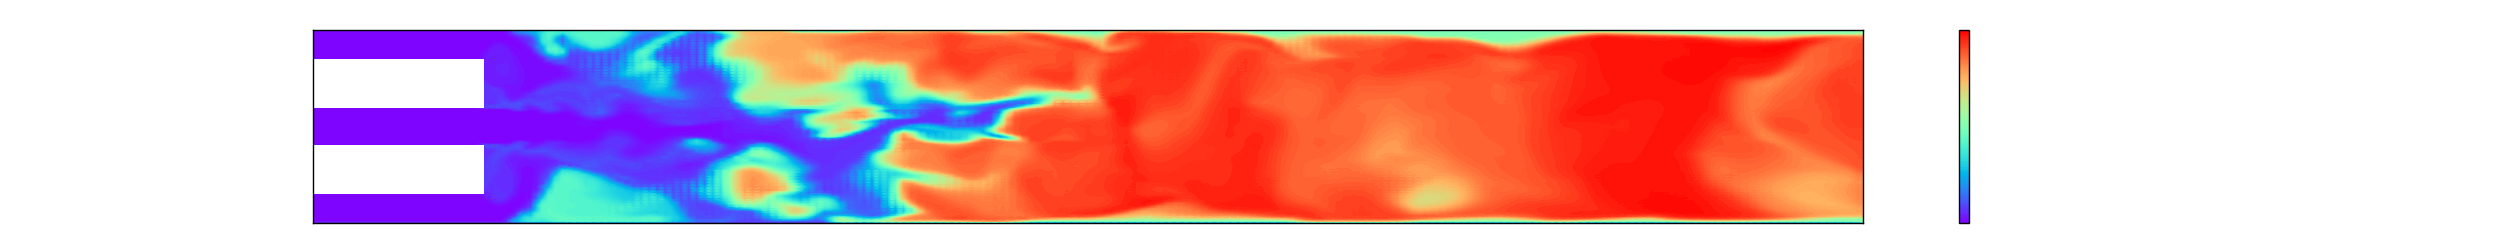

In [33]:
from ofpost.ofsurf import *

fieldname = 'T'

filename = fieldname+'_zNormal.vtk'
surf = ofsurf(case_dir, filename)
field = surf.getScalarField()

plt.figure(figsize = (20, 2))
plt.tricontourf(surf.x, surf.y, surf.tri, field, 100, cmap = 'rainbow')
plt.colorbar(format='%.1f')
plt.xlabel('X, [mm]', color = 'w')
plt.ylabel('Y, [mm]', color = 'w')
plt.title('Time: %ss' % surf.time, color = 'w')
plt.show()

<IPython.core.display.Javascript object>


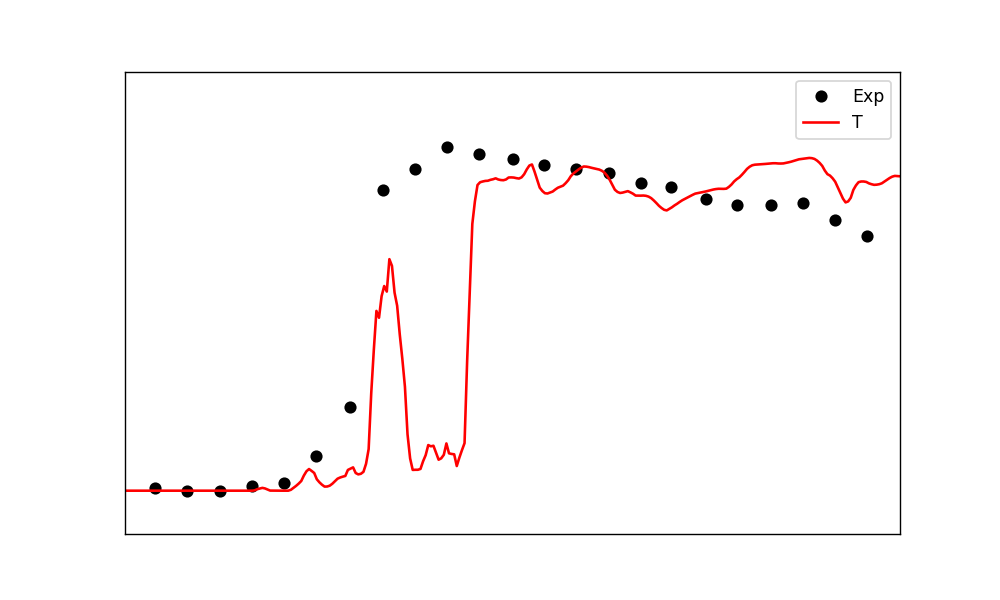

In [34]:
import matplotlib.animation as animation
%matplotlib notebook

fig, ax = plt.subplots() 
expData = pd.read_csv('/home/gaozw/wchb/ExpData/case1.csv') 
plt.plot(expData['x'], expData['T'], 'ko', label = 'Exp')

filename = 'axis_Ha_Hadia_T_alphaParam.csv'

sets = ofsets(case_dir, filename)
fieldname = 'T'
ln1, = ax.plot(sets.get("x"), sets.get(fieldname), 'r-', label = fieldname)
title = 'Time: %ss' % sets.time 
ax.set_title(title, color = 'w') 

# def animate(i):
#     time = 0.005*i + 0.4
#     sets = ofsets(case_dir, filename, time)
#     ln1.set_data(sets.get("x"), sets.get("T"))
#     title = 'Time: %.3f s' %time
#     ax.set_title(title)   
# ani = animation.FuncAnimation(fig, animate, interval = 500)

ax.set_xlim(-0.01, 0.08)
ax.set_ylim(600, 1400)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


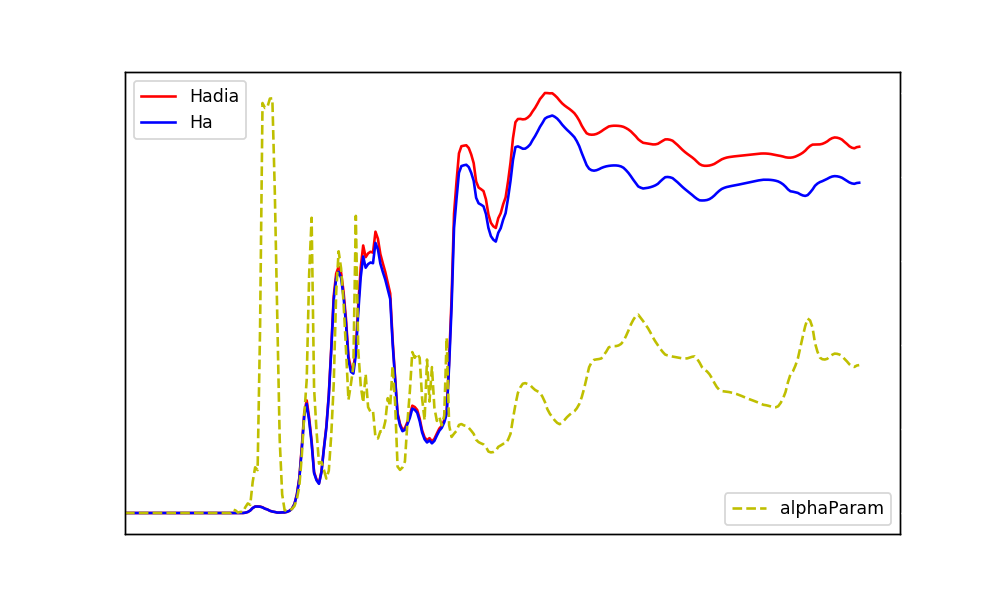

In [35]:
plt.figure()

filename = 'axis_Ha_Hadia_T_alphaParam.csv'
sets = ofsets(case_dir, filename, time = None)

ax = plt.subplot(111)

fieldname = 'Hadia'
ax.plot(sets.get("x"), sets.get(fieldname), 'r-', label = fieldname)
fieldname = 'Ha'
ax.plot(sets.get("x"), sets.get(fieldname), 'b-', label = fieldname)

ax.set_title('Time: %s' % sets.time, color = 'w')
ax.legend(loc = 2)
ax.set_xlim(-0.01, 0.085)
ax.set_ylabel('Enthalpy', color = 'w')

ax2 = ax.twinx()
fieldname = 'alphaParam'
ax2.plot(sets.get("x"), sets.get(fieldname), 'y--', label = fieldname)
ax2.set_ylabel(fieldname, color = 'w')
ax2.set_ylim(-0.05, 1.05)
plt.legend(loc = 4)